Test para ver deconvolución peque en 1D

In [1]:
import numpy as np

a = np.zeros(9)
a[3] = 1
a[7] = 2
# The kernel has its central point (0 displacement) in the middle (FFT sense of middle)
k = np.array([0.05,0.1,1,0.4])
# The signal and the kernel are padded to avoid circularity effects
n_a = len(a)
n_k = len(k)
padding_k = n_a - 1
padding_a = n_k - 1
# If the kernel has odd elements, first take to even by completing at the beggining
if n_k % 2:
    kpad = np.pad(k,(np.int(np.ceil(padding_k/2)),np.int(np.floor(padding_k/2))))
else:
    kpad = np.pad(k,(np.int(np.floor(padding_k/2)),np.int(np.ceil(padding_k/2))))
kpad = np.fft.ifftshift(kpad)

fk = np.fft.fft(kpad)
ak = np.fft.fft(np.pad(a,(0,padding_a))) * fk
ak = np.real(np.fft.ifft(ak))
ak = ak[:n_a]
print(ak)

[1.48029737e-16 5.00000000e-02 1.00000000e-01 1.00000000e+00
 4.00000000e-01 1.00000000e-01 2.00000000e-01 2.00000000e+00
 8.00000000e-01]


Let's see if 1D deconvolution works. The FT of the kernel is from a ifftshifted kernel having the center on the middle (FFT sense).

In [2]:
beta = 0.0001

fak = np.fft.fft(np.pad(ak,(0,padding_a)))
dec_a = np.real(np.fft.ifft(fak / (fk + beta)))
dec_a = dec_a[:n_a]
print(dec_a)

[ 1.85690591e-06  3.88931108e-06  6.98258615e-06  9.99893386e-01
  4.24486628e-05 -8.25638887e-06  2.03699825e-05  1.99978482e+00
  8.89806754e-05]


Test para ver cómo sería una deconvolución peque. Creo una matriz con algunos puntos distintos de 0 y convoluciono con un kernel 3D. Después intento lo que sería la deconvolución. Para convolucionar hago 

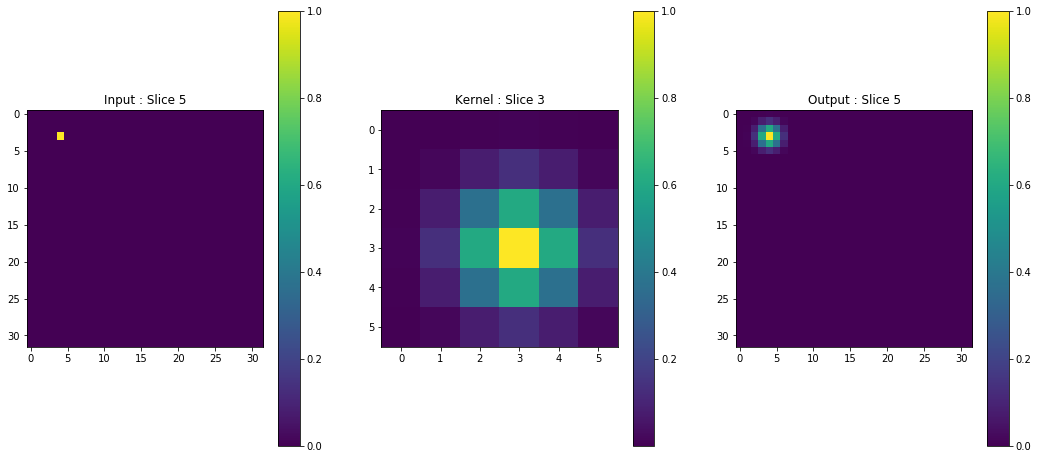

In [3]:
from matplotlib import pyplot as plt

a = np.zeros((32,32,32))
a[3,4,5] = 1
a[12,24,10] = 2
a[28,7,23] = 3
# Set kernel
xx, yy, zz = np.meshgrid(range(-3,3),range(-3,3),range(-3,3))
kernel = np.exp(-(xx**2 + yy**2 + zz**2)/2)
# The signal and the kernel are padded to avoid circularity effects
s_a = a.shape
s_k = kernel.shape
padding_k = np.asarray(s_a) - 1
padding_a = np.asarray(s_k) - 1
padding_a = ((0,padding_a[0]), (0,padding_a[1]), (0,padding_a[2]))
# If the kernel has odd elements, first take to even by completing at the beggining
pad_sides_k = np.zeros((3,2), dtype=np.int)
for d in range(3):
    if s_k[d] % 2:
        pad_sides_k[d] = (np.int(np.ceil(padding_k[d]/2)),np.int(np.floor(padding_k[d]/2)))
    else:
        pad_sides_k[d] = (np.int(np.floor(padding_k[d]/2)),np.int(np.ceil(padding_k[d]/2)))
kpad = np.pad(kernel,pad_sides_k)
kpad = np.fft.ifftshift(kpad)
# Pad the signal
apad = np.pad(a, padding_a)
# Convolute kernel by means of FFT3D
fa = np.fft.fftn(apad)
fk = np.fft.fftn(kpad)
cak = np.real(np.fft.ifftn(fa*fk))
cak = cak[:s_a[0],:s_a[1],:s_a[2]]

see_slide = 5
see_slide_k = 3
fig, ax = plt.subplots(1, 3, figsize=(18,8))
ax[0].set_title("Input : Slice {}".format(see_slide))
pcm = ax[0].imshow(a[:,:,see_slide])
fig.colorbar(pcm,ax=ax[0])
ax[1].set_title("Kernel : Slice {}".format(see_slide_k))
pcm = ax[1].imshow(kernel[:,:,see_slide_k])
fig.colorbar(pcm,ax=ax[1])
ax[2].set_title("Output : Slice {}".format(see_slide))
pcm = ax[2].imshow(cak[:,:,see_slide])
fig.colorbar(pcm,ax=ax[2])

Time to do 3D deconvolution

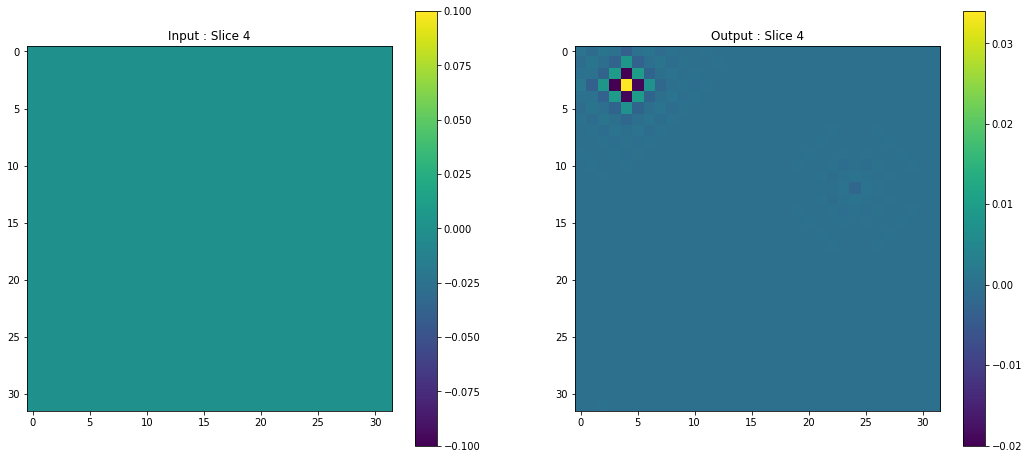

In [7]:
beta = 0.001

fak = np.fft.fftn(np.pad(cak,padding_a))
dec_a = np.fft.ifftn(fak / (fk + beta))
dec_a = np.real(dec_a[:s_a[0],:s_a[1],:s_a[2]])

see_slide = 4
see_slide_k = 3
fig, ax = plt.subplots(1, 2, figsize=(18,8))
ax[0].set_title("Input : Slice {}".format(see_slide))
pcm = ax[0].imshow(a[:,:,see_slide])
fig.colorbar(pcm,ax=ax[0])
ax[1].set_title("Output : Slice {}".format(see_slide))
pcm = ax[1].imshow(dec_a[:,:,see_slide])
fig.colorbar(pcm,ax=ax[1])